In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
sns.set()

In [3]:
data = pd.read_csv('C:/Users/HP/OneDrive/Desktop/supermarket_sales - Sheet1.csv')

In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
for x in data.columns :
    if 'Date' in x or 'Time' in x :
        data[x] = pd.to_datetime(data[x])

C:\Users\HP\AppData\Local\Temp\ipykernel_8884\4164997800.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[x] = pd.to_datetime(data[x])


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [11]:
data.columns = data.columns.str.lower().str.strip()

In [13]:
data.columns

Index(['invoice id', 'branch', 'city', 'customer type', 'gender',
       'product line', 'unit price', 'quantity', 'tax 5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross margin percentage', 'gross income',
       'rating'],
      dtype='object')

In [14]:
cols =['branch', 'city', 'customer type', 'gender',
       'product line', 'payment']

In [17]:
for col in cols :
    print(f"{col} unique values : {data[col].unique()}")

branch unique values : ['A' 'C' 'B']
city unique values : ['Yangon' 'Naypyitaw' 'Mandalay']
customer type unique values : ['Member' 'Normal']
gender unique values : ['Female' 'Male']
product line unique values : ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
payment unique values : ['Ewallet' 'Cash' 'Credit card']


C:\Users\HP\AppData\Local\Temp\ipykernel_8884\1998324314.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\1998324314.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\1998324314.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\1998324314.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\1998324314.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\1998324314.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\1998324314.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


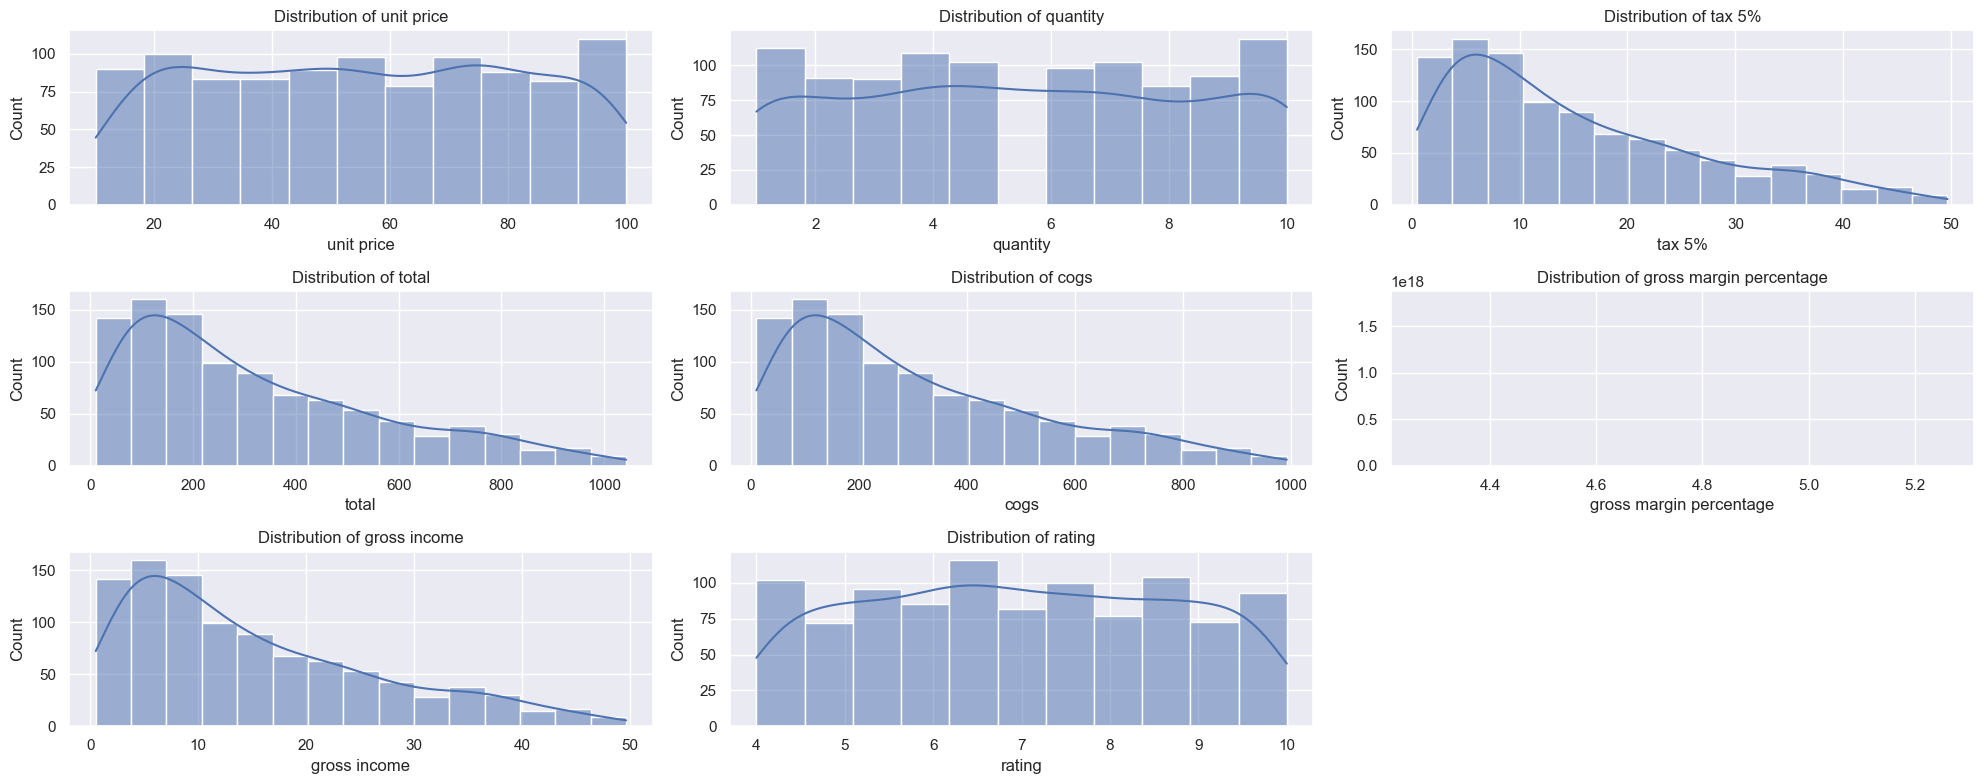

In [25]:
n_cols = data.select_dtypes('number') 
plt.figure(figsize = (20,8))
for x ,y in enumerate(n_cols):
    plt.subplot(3,3,x+1)
    sns.histplot(n_cols[y] , kde = True)
    plt.title('Distribution of ' + y)
    plt.tight_layout()

In [28]:
data.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_8884\2841925512.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\2841925512.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\2841925512.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\2841925512.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\2841925512.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\2841925512.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\2841925512.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


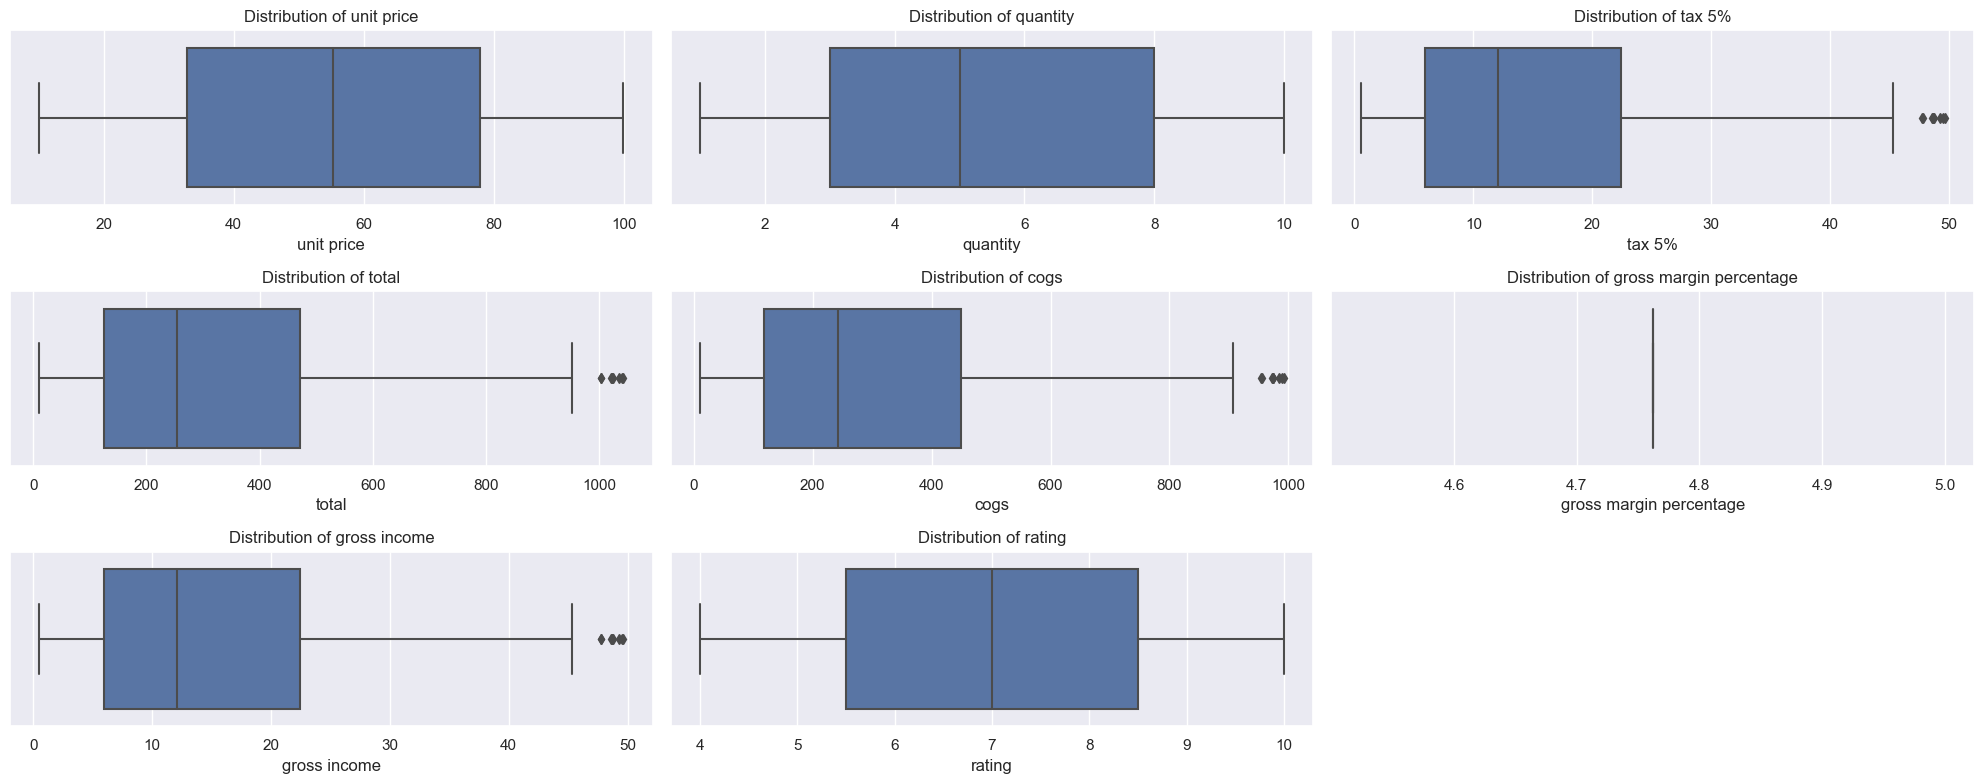

In [30]:
n_cols = data.select_dtypes('number') 
plt.figure(figsize = (20,8))
for x ,y in enumerate(n_cols):
    plt.subplot(3,3,x+1)
    sns.boxplot(x = n_cols[y])
    plt.title('Distribution of ' + y)
    plt.tight_layout()

C:\Users\HP\AppData\Local\Temp\ipykernel_8884\4179915331.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\4179915331.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\4179915331.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\4179915331.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8884\4179915331.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


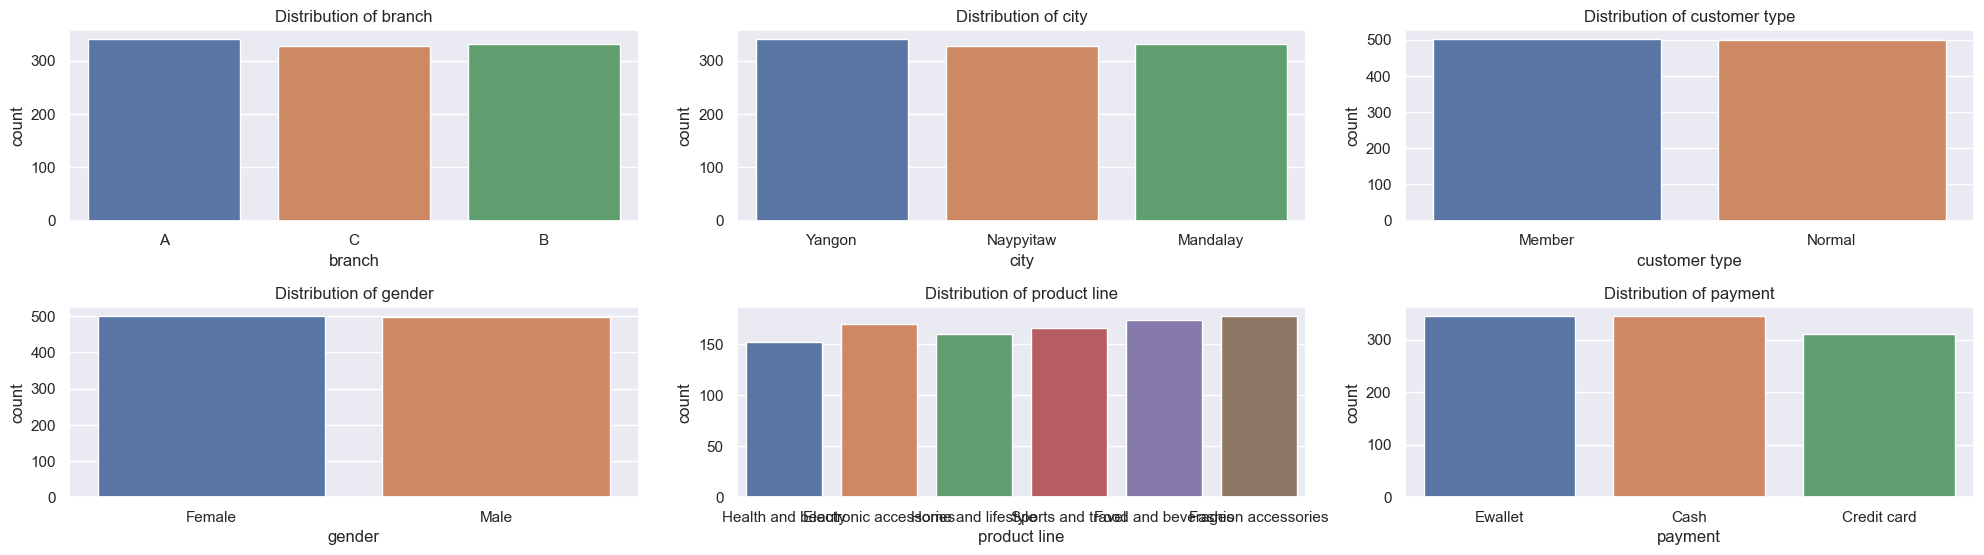

In [42]:
o_cols = data.select_dtypes('object') 
plt.figure(figsize = (20,8))
for x ,y in enumerate(o_cols.iloc[:,1:]):
    plt.subplot(3,3,x+1)
    sns.countplot(data = o_cols , x = y )
    plt.title('Distribution of ' + y)
    plt.tight_layout()

In [45]:
px.bar(o_cols['product line'].value_counts(), title = 'Distribution of product line' )

In [48]:
px.pie(data_frame = o_cols , names = 'gender', title = 'Distribution of gender' )

In [54]:
grouping = data.groupby(['branch' , 'gender'] , as_index = False)['cogs'].count()
px.bar(data_frame = grouping , x = 'gender' , color = 'branch', y = 'cogs' , title = 'number od M/f in eachbranch')

In [61]:
grouping = data[['branch' , 'total' , 'date']]
grouping = grouping.groupby(['branch' , 'date'] , as_index = False)['total'].sum()
grouping = grouping.pivot(index = 'date' , columns = 'branch' , values = 'total')
grouping.head()

branch,A,B,C
date,,,
2019-01-01,2371.3200,1536.6960,837.1650
2019-01-02,307.0515,1162.8015,475.6500
2019-01-03,937.4085,1016.6940,124.0260
2019-01-04,483.2625,510.5835,629.8425
2019-01-05,2024.5050,486.7590,1025.4195


In [62]:
px.line(data_frame = grouping )

In [63]:
normalization = grouping / grouping.iloc[0,:]
normalization.head()

branch,A,B,C
date,,,
2019-01-01,1.000000,1.000000,1.000000
2019-01-02,0.129485,0.756689,0.568168
2019-01-03,0.395311,0.661610,0.148150
2019-01-04,0.203795,0.332261,0.752352
2019-01-05,0.853746,0.316757,1.224871


In [66]:

px.line(data_frame = normalization , title = 'The Sales Movement For Each Branch')

In [70]:
grouping = data.groupby('branch' , as_index = False)['total'].sum()
px.pie(data_frame = grouping , names = 'branch' , values = 'total')

In [91]:
grouping = data[['branch' , 'gender' , 'date' , 'rating']]
grouping = grouping.pivot_table(index = grouping['date'].dt.to_period('M') , columns = ['branch' , 'gender'] , values = 'rating', aggfunc = 'mean')
grouping

branch          A                   B                   C          
gender     Female      Male    Female      Male    Female      Male
date                                                               
2019-01  7.056863  7.094118  6.918966  6.673585  7.220896  7.074545
2019-02  6.639583  7.391304  6.965455  7.051852  7.147541  7.282051
2019-03  6.814516  7.164615  6.726531  6.588889  7.086000  6.655357